# MNIST digit prediction using CNN


In [34]:
import numpy as np
import pandas as pd

In [35]:
import keras
from keras.datasets import mnist
from keras.models import Sequential

In [36]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [37]:
xtrain.shape

(60000, 28, 28)

In [38]:
#We have 60,000 Greyscale Images of dimension 28*28 in the test set.


In [39]:
#Normalizing the data by dividing with 255:
xtest = xtest/255
xtrain = xtrain/255

In [40]:
xtrain = xtrain.reshape(-1,28,28,1)

In [41]:
xtrain[2].shape

(28, 28, 1)

In [42]:
xtest = xtest.reshape(-1,28,28,1)

In [43]:
xtest.shape

(10000, 28, 28, 1)

In [44]:
xtest.dtype

dtype('float64')

In [45]:
xtrain.dtype

dtype('float64')

In [46]:
#Encoding y:

y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest,10)

In [54]:
#Let us view random images along with their labels:
from random import randrange
import matplotlib.pyplot as plt
from PIL import Image



20566 th digit is:
digit of the given image:  7


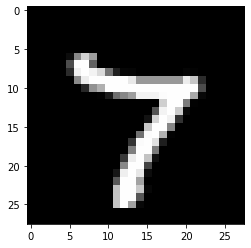

59425 th digit is:
digit of the given image:  2


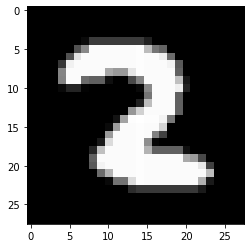

7953 th digit is:
digit of the given image:  2


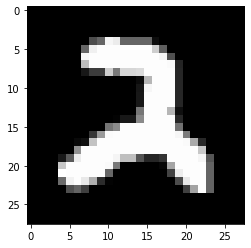

30920 th digit is:
digit of the given image:  1


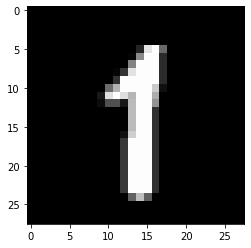

27859 th digit is:
digit of the given image:  0


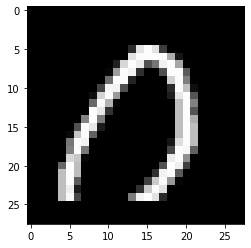

36627 th digit is:
digit of the given image:  8


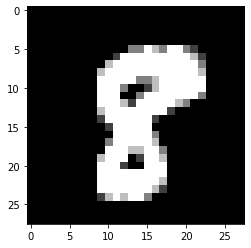

12713 th digit is:
digit of the given image:  5


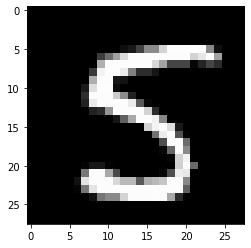

50681 th digit is:
digit of the given image:  7


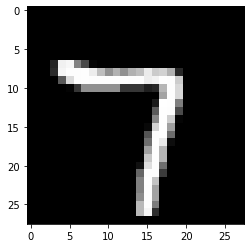

46812 th digit is:
digit of the given image:  0


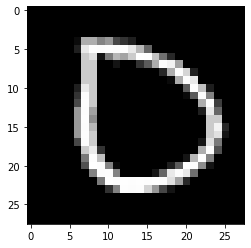

24866 th digit is:
digit of the given image:  4


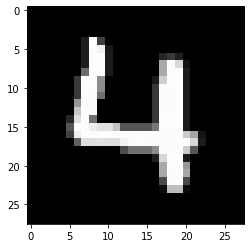

In [57]:
for i in range(10):
    l = randrange(60000)
    print(l, "th digit is:")
    print("digit of the given image: ", ytrain[l])
    plt.imshow(xtrain.reshape(60000,28,28)[l],cmap="gray")
    plt.show()

In [59]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense,BatchNormalization
from keras.models import Sequential

In [67]:
#Let us build a CNN model:

model=Sequential()
    
model.add(Conv2D(256,(3,3), activation='relu', input_shape=xtrain[1].shape,padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(10,activation='sigmoid'))

In [68]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [69]:
history = model.fit(xtrain, y_train,
                    batch_size=100,
                    epochs=20,
                    verbose=2,
                    validation_data=(xtest, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 80s - loss: 0.2372 - accuracy: 0.9255 - val_loss: 0.1116 - val_accuracy: 0.9664
Epoch 2/20
 - 66s - loss: 0.0931 - accuracy: 0.9714 - val_loss: 0.0485 - val_accuracy: 0.9842
Epoch 3/20
 - 77s - loss: 0.0730 - accuracy: 0.9769 - val_loss: 0.0432 - val_accuracy: 0.9862
Epoch 4/20
 - 73s - loss: 0.0621 - accuracy: 0.9811 - val_loss: 0.0390 - val_accuracy: 0.9868
Epoch 5/20
 - 61s - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.0417 - val_accuracy: 0.9850
Epoch 6/20
 - 57s - loss: 0.0534 - accuracy: 0.9834 - val_loss: 0.0381 - val_accuracy: 0.9881
Epoch 7/20
 - 59s - loss: 0.0489 - accuracy: 0.9845 - val_loss: 0.0364 - val_accuracy: 0.9879
Epoch 8/20
 - 68s - loss: 0.0456 - accuracy: 0.9854 - val_loss: 0.0344 - val_accuracy: 0.9888
Epoch 9/20
 - 71s - loss: 0.0436 - accuracy: 0.9861 - val_loss: 0.0376 - val_accuracy: 0.9881
Epoch 10/20
 - 77s - loss: 0.0406 - accuracy: 0.9867 - val_loss: 0.0279 - val_accuracy: 0.9907
Epoch 11/

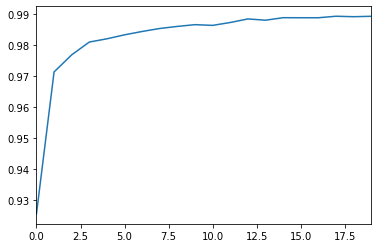

In [70]:
df_result = pd.DataFrame.from_dict(history.history)
df_result['accuracy'].plot()

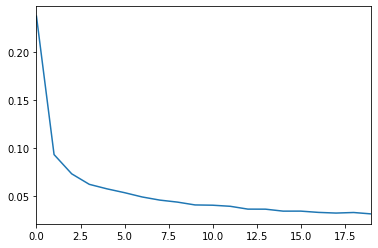

In [71]:
df_result['loss'].plot()